In [58]:

import vmapper
import os
import pandas as pd
os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd
from shapely.geometry import Polygon, LineString

import matplotlib.pyplot as plt
import seaborn as sns

from catppuccin_palette import catppuccin as cpc
import mplcatppuccin
from mplcatppuccin.palette import load_color
from mplcatppuccin.colormaps import get_colormap_from_list
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib as mpl
#from jinja2 import Environment, PackageLoader, select_autoescape
import jinja2

<Axes: >

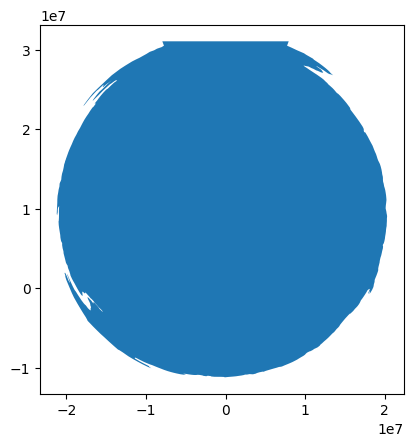

In [2]:
fp = '../data/natural_earth/ne_110m_admin_0_countries.shp'
#fp = 'data/natural_earth/ne_110m_land.shp'
gdf = gpd.read_file(fp)
#gdf.plot()
gdf.to_crs('+proj=tissot +lat_1=60 +lat_2=65').plot()

In [4]:
gdf2 = gdf[gdf['SOV_A3']=='ATA']

In [5]:
gdf2

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
159,Admin-0 country,1,4,Antarctica,ATA,0,2,Indeterminate,1,Antarctica,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-48.66062 -78.04702, -48.15140..."


In [6]:
gdf2.geometry

159    MULTIPOLYGON (((-48.66062 -78.04702, -48.15140...
Name: geometry, dtype: geometry

In [15]:
for g in list(gdf2.geometry.tolist()[0].geoms):
    print(g)
    print(g.area)

POLYGON ((-48.66061601418252 -78.04701873159873, -48.1513964503784 -78.04706960058677, -46.66285681821098 -77.83147552506506, -45.15475765642109 -78.04706960058677, -43.92082780615574 -78.47810272233328, -43.48994971370611 -79.0855599913685, -43.37243750667439 -79.51664478954731, -43.33326677099714 -80.0261227355129, -44.880536668464266 -80.33964365022769, -46.50617387550203 -80.59435678499433, -48.38642086444183 -80.82948455192233, -50.48210689960646 -81.02544158317313, -52.85198808451179 -80.96668547965729, -54.16425940613162 -80.63352752067158, -53.987991095584036 -80.22202809033138, -51.85313432474216 -79.94772958772612, -50.99132646341059 -79.6146233051727, -50.364594692574755 -79.1834868305616, -49.91413123228649 -78.81120900488669, -49.30695899107312 -78.45856903092695, -48.66061601418252 -78.04701792415447, -48.66061601418252 -78.04701873159873))
20.382879453418244
POLYGON ((-66.29003089055513 -80.25577280061798, -64.03768775089767 -80.29494353629522, -61.88324561221718 -80.392

/tmp/ipykernel_264132/3321136586.py:1: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  gdf3 = gdf2.explode()


<Axes: >

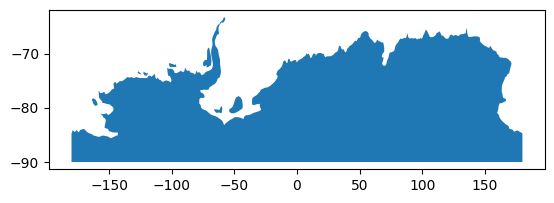

In [18]:
gdf3 = gdf2.explode()
gdf3.plot()

In [21]:
print(gdf3.iloc[7]['geometry'])

POLYGON ((180 -84.71337999999997, 180 -90, -179.99999999999994 -90, -179.99999999999994 -84.71337999999997, -179.94249935617898 -84.72144337355252, -179.05867733469117 -84.13941171664914, -177.25677181710577 -84.45293263136392, -177.1408066732658 -84.41794122714828, -176.08467281807765 -84.09925912875838, -175.94723461362773 -84.11044871021659, -175.82988216866258 -84.11791432081571, -174.38250281481567 -84.53432301222352, -173.11655941474544 -84.11791432081571, -172.88910559801278 -84.06101856886238, -169.9512229075714 -83.88464690545015, -168.9999889801587 -84.11791432081571, -168.5301985341933 -84.23739023227444, -167.02209937240337 -84.57049651482794, -164.1821435211551 -84.82520964959463, -161.9297745432814 -85.13873056430941, -158.07137956442492 -85.37391000766968, -155.19225297749927 -85.09955982863215, -150.942098965438 -85.29551685988292, -148.53307288307155 -85.60903777459771, -145.88891822633295 -85.31510222772158, -143.10771847860048 -85.04075204868394, -142.89227943237557 

In [36]:
poly = gdf3.iloc[7]['geometry']

xx, yy = poly.exterior.coords.xy
xx = list(xx)
yy = list(yy)
xx[:5], yy[:5]

([180.0, 180.0, -179.99999999999994, -179.99999999999994, -179.94249935617898],
 [-84.71337999999997, -90.0, -90.0, -84.71337999999997, -84.72144337355252])

In [37]:
xs = []
ys = []
for i in range(1,72):
    x = i*5-180
    xs.append(x)
    ys.append(-90.0)
xs = xs[::-1]
#xs

In [38]:
xx2 = xx[:2] + xs + xx[2:]
yy2 = yy[:2] + ys + yy[2:]

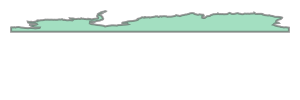

In [41]:

poly = Polygon(zip(xx2,yy2))
poly

<Axes: >

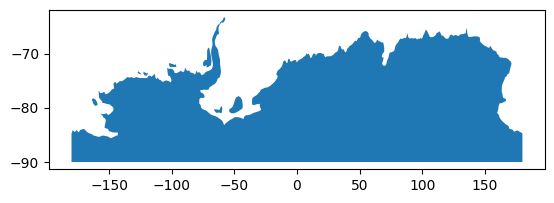

In [43]:
geoms = gdf3['geometry'].tolist()
geoms = geoms[:-1] + [poly]
gdf3['geometry'] = geoms

gdf3.plot()

<Axes: >

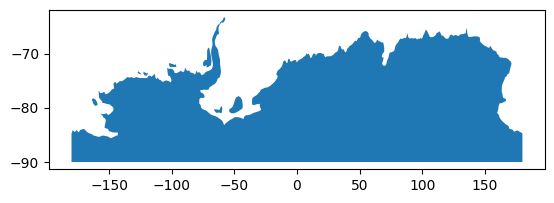

In [45]:
gdf2b = gdf3.dissolve()
gdf2b.plot()

In [46]:
gdf2b

,geometry,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,...,FCLASS_VN,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA
0,"MULTIPOLYGON (((-61.13898 -79.98137, -60.61012...",Admin-0 country,1,4,Antarctica,ATA,0,2,Indeterminate,1,...,None,None,None,None,None,None,None,None,None,None


<Axes: >

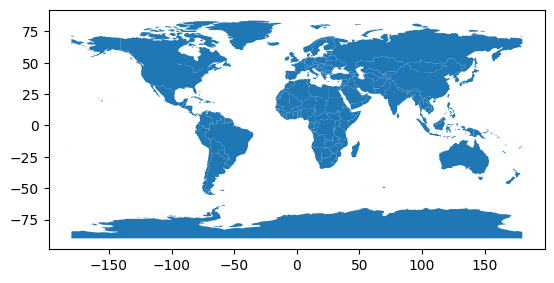

In [51]:
gdfb =  gdf[gdf['SOV_A3']!='ATA']
gdfb = pd.concat([gdfb, gdf2b])
gdfb.plot()

<Axes: >

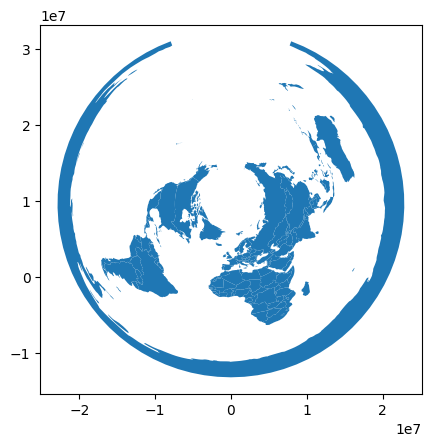

In [52]:

gdfb.to_crs('+proj=tissot +lat_1=60 +lat_2=65').plot()

In [54]:
fp2 = '../data/natural_earth/ne_110m_admin_0_countries2.shp'

gdfb.to_file(fp2)

In [12]:

for i in range(0,73):
    x = i*5-180
    print(x)

-180
-175
-170
-165
-160
-155
-150
-145
-140
-135
-130
-125
-120
-115
-110
-105
-100
-95
-90
-85
-80
-75
-70
-65
-60
-55
-50
-45
-40
-35
-30
-25
-20
-15
-10
-5
0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180


In [11]:
for i in range(37):
    y = 90-i*5
    print(y)

90
85
80
75
70
65
60
55
50
45
40
35
30
25
20
15
10
5
0
-5
-10
-15
-20
-25
-30
-35
-40
-45
-50
-55
-60
-65
-70
-75
-80
-85
-90


In [40]:

x = 120 - 180
for i in range(1,73):
    # go west
    x = x - 5
    if x<-180:
        x = x+360
    print(x)

-65
-70
-75
-80
-85
-90
-95
-100
-105
-110
-115
-120
-125
-130
-135
-140
-145
-150
-155
-160
-165
-170
-175
-180
175
170
165
160
155
150
145
140
135
130
125
120
115
110
105
100
95
90
85
80
75
70
65
60
55
50
45
40
35
30
25
20
15
10
5
0
-5
-10
-15
-20
-25
-30
-35
-40
-45
-50
-55
-60


In [49]:
xs = []
ys = []
y = -90
x = 120 - 180 -5
for i in range(0,73):
    # go east
    x = x+5
    if x>180:
        x = x-360
    xs.append(x)
    ys.append(y)

for i in range(1, 37):
    # go north
    y = y + 5
    xs.append(x)
    ys.append(y)

for i in range(1,73):
    # go west
    x = x - 5
    if x<-180:
        x = x+360
    xs.append(x)
    ys.append(y)

for i in range(1, 37):
    # go north
    y = y - 5
    xs.append(x)
    ys.append(y)
    
box_xys = []
for x, y in list(zip(xs, ys)):#[-5:]:
    box_xys.append((x,y))

<Axes: >

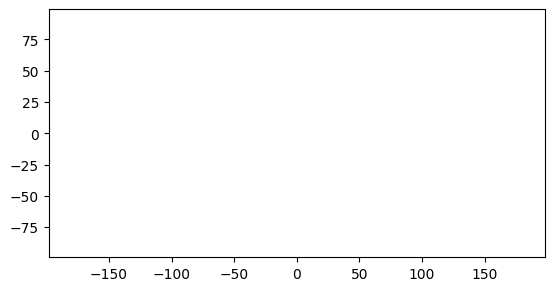

In [50]:
square = Polygon(box_xys)
gdf_sq = gpd.GeoSeries(square, crs='epsg:4326')
gdf_sq.plot()

<Axes: >

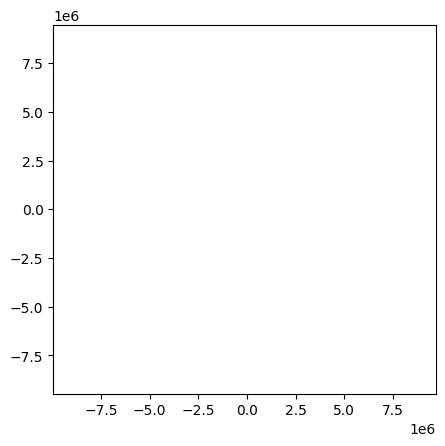

In [19]:

this_crs = '+proj=robin +lon_0=120 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs +type=crs' 
gdf_sq2 = gdf_sq.to_crs(this_crs)
gdf_sq2.plot()

In [20]:
gdf_sq2.head()

0    POLYGON ((3016834.713 -8625154.665, 2765431.82...
dtype: geometry

In [22]:
gdf_sq2.total_bounds

array([-9050504.13846534, -8625154.6651    ,  8799101.24573019,
        8625154.6651    ])

In [54]:
x1 = (120-180)+0.1
x2 = (120-180)-0.1
print(x1, x2)

-59.9 -60.1


In [56]:

y = -90
x1 = (120-180)+0.1
x2 = (120-180)-0.1
print(x1, x2)

line1 = []
line2 = []
for i in range(1, 37):
    # go north
    y = y + 5
    line1.append((x1, y))
    line2.append((x2, y))


-59.9 -60.1
[-59.9, -59.9, -59.9, -59.9, -59.9, -59.9, -59.9, -59.9, -59.9, -59.9, -59.9, -59.9, -59.9, -59.9, -59.9, -59.9, -59.9, -59.9, -59.9, -59.9, -59.9, -59.9, -59.9, -59.9, -59.9, -59.9, -59.9, -59.9, -59.9, -59.9, -59.9, -59.9, -59.9, -59.9, -59.9, -59.9] [-85, -80, -75, -70, -65, -60, -55, -50, -45, -40, -35, -30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90]


-59.9 -60.1


<Axes: >

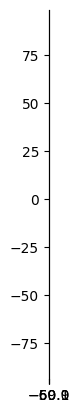

In [59]:

y = -90
x1 = (120-180)+0.1
x2 = (120-180)-0.1
print(x1, x2)

line1 = []
line2 = []
for i in range(1, 37):
    # go north
    y = y + 5
    line1.append((x1, y))
    line2.append((x2, y))

line1 = LineString(line1)
line2 = LineString(line2)

line_gdf = gpd.GeoDataFrame(geometry=[line1, line2])
line_gdf.plot()